In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [35]:
load_dir = "H_Env_Base_Pen_Test3"
exp_num = 5
env_num = 3

In [36]:
def load_by_expId_envId(load_dir, expId, envId):
    file_path = load_dir + "/" + str(expId) +"_SngleModel_env_+" +str(envId)+"_reward_logs.npy"
    print("file path = " + file_path)
    reward_log = np.load(file_path)
    return reward_log

In [37]:
test_log_1 = load_by_expId_envId(load_dir, 0, 0)

file path = H_Env_Base_Pen_Test3/0_SngleModel_env_+0_reward_logs.npy


In [38]:
def load_reward_by_envId(load_dir, exp_num, envId):
    res = []
    for expId in range(exp_num):
#         print(expId)
        cur_load = load_by_expId_envId(load_dir , expId, envId)
        res.append(cur_load)
    return res

In [39]:
env0_log = load_reward_by_envId(load_dir, exp_num, envId=0)
env1_log = load_reward_by_envId(load_dir, exp_num, envId=1)
env2_log = load_reward_by_envId(load_dir, exp_num, envId=2)

file path = H_Env_Base_Pen_Test3/0_SngleModel_env_+0_reward_logs.npy
file path = H_Env_Base_Pen_Test3/1_SngleModel_env_+0_reward_logs.npy
file path = H_Env_Base_Pen_Test3/2_SngleModel_env_+0_reward_logs.npy
file path = H_Env_Base_Pen_Test3/3_SngleModel_env_+0_reward_logs.npy
file path = H_Env_Base_Pen_Test3/4_SngleModel_env_+0_reward_logs.npy
file path = H_Env_Base_Pen_Test3/0_SngleModel_env_+1_reward_logs.npy
file path = H_Env_Base_Pen_Test3/1_SngleModel_env_+1_reward_logs.npy
file path = H_Env_Base_Pen_Test3/2_SngleModel_env_+1_reward_logs.npy
file path = H_Env_Base_Pen_Test3/3_SngleModel_env_+1_reward_logs.npy
file path = H_Env_Base_Pen_Test3/4_SngleModel_env_+1_reward_logs.npy
file path = H_Env_Base_Pen_Test3/0_SngleModel_env_+2_reward_logs.npy
file path = H_Env_Base_Pen_Test3/1_SngleModel_env_+2_reward_logs.npy
file path = H_Env_Base_Pen_Test3/2_SngleModel_env_+2_reward_logs.npy
file path = H_Env_Base_Pen_Test3/3_SngleModel_env_+2_reward_logs.npy
file path = H_Env_Base_Pen_Test3/4

In [41]:
len(env0_log)

5

In [7]:
def load_all(load_dir, exp_num, env_num):
    all_reward = []
    for envId in range(env_num):
        env_log = load_reward_by_envId(load_dir, exp_num, envId)
        all_reward.append(env_log)
        
    return all_reward

In [8]:
all_reward_log = load_all(load_dir, exp_num, env_num)

file path = H_Env_Base_Pen_Test3/0_SngleModel_env_+0_reward_logs.npy
file path = H_Env_Base_Pen_Test3/1_SngleModel_env_+0_reward_logs.npy
file path = H_Env_Base_Pen_Test3/2_SngleModel_env_+0_reward_logs.npy
file path = H_Env_Base_Pen_Test3/3_SngleModel_env_+0_reward_logs.npy
file path = H_Env_Base_Pen_Test3/4_SngleModel_env_+0_reward_logs.npy
file path = H_Env_Base_Pen_Test3/0_SngleModel_env_+1_reward_logs.npy
file path = H_Env_Base_Pen_Test3/1_SngleModel_env_+1_reward_logs.npy
file path = H_Env_Base_Pen_Test3/2_SngleModel_env_+1_reward_logs.npy
file path = H_Env_Base_Pen_Test3/3_SngleModel_env_+1_reward_logs.npy
file path = H_Env_Base_Pen_Test3/4_SngleModel_env_+1_reward_logs.npy
file path = H_Env_Base_Pen_Test3/0_SngleModel_env_+2_reward_logs.npy
file path = H_Env_Base_Pen_Test3/1_SngleModel_env_+2_reward_logs.npy
file path = H_Env_Base_Pen_Test3/2_SngleModel_env_+2_reward_logs.npy
file path = H_Env_Base_Pen_Test3/3_SngleModel_env_+2_reward_logs.npy
file path = H_Env_Base_Pen_Test3/4

In [9]:
def plot_all_experiments(rewards, env_id, plot_individual_envs=False):
    num_experiments = len(rewards)
    num_rounds, num_envs = rewards[0].shape

    all_rewards = np.array(rewards)
    
    # 计算每个环境的均值和方差
    mean_rewards = np.mean(all_rewards, axis=0)
    std_rewards = np.std(all_rewards, axis=0)
    
    # 计算所有环境的均值和方差
    avg_mean_rewards = np.mean(mean_rewards, axis=1)
    avg_std_rewards = np.std(mean_rewards, axis=1)
    
    # 打印每个环境的最终均值和方差
    print("Final mean rewards and standard deviations for each environment:")
    for env in range(num_envs):
        final_mean_reward = mean_rewards[-1, env]
        final_std_reward = std_rewards[-1, env]
        print(f"Environment {env + 1} - Final Mean Reward: {final_mean_reward:.2f}, Final Std Dev: {final_std_reward:.2f}")
    
    # 打印所有环境的平均均值和方差
    final_avg_mean_reward = avg_mean_rewards[-1]
    final_avg_std_reward = avg_std_rewards[-1]
    print(f"All Environments - Final Average Mean Reward: {final_avg_mean_reward:.2f}, Final Std Dev: {final_avg_std_reward:.2f}")
    
    if plot_individual_envs:
        for env in range(num_envs):
            plt.figure(figsize=(12, 8), dpi=100)
            plt.plot(mean_rewards[:, env], label=f'Environment {env + 1}', linewidth=2)
            plt.fill_between(range(num_rounds), mean_rewards[:, env] - std_rewards[:, env], mean_rewards[:, env] + std_rewards[:, env], alpha=0.2)
            
            plt.xlabel('Rounds', fontsize=14)
            plt.ylabel('Reward', fontsize=14)
            plt.title(f'Mean Rewards for Environment {env + 1}', fontsize=16)
            plt.legend(fontsize=12)
            plt.grid(True)
            plt.show()
        
        # 绘制平均值的图
        plt.figure(figsize=(12, 8), dpi=100)
        plt.plot(avg_mean_rewards, label='Average', linestyle='--', color='black', linewidth=2)
        plt.fill_between(range(num_rounds), avg_mean_rewards - avg_std_rewards, avg_mean_rewards + avg_std_rewards, color='black', alpha=0.2)
        
        plt.xlabel('Rounds', fontsize=14)
        plt.ylabel('Reward', fontsize=14)
        plt.title('Mean Rewards Across All Experiments', fontsize=16)
        plt.legend(fontsize=12)
        plt.grid(True)
        plt.show()

    # 绘制所有环境的均值和方差
    plt.figure(figsize=(12, 8), dpi=100)
    for env in range(num_envs):
        plt.plot(mean_rewards[:, env], label=f'Environment {env_id + 1}', linewidth=2)
        plt.fill_between(range(num_rounds), mean_rewards[:, env] - std_rewards[:, env], mean_rewards[:, env] + std_rewards[:, env], alpha=0.2)
    
    plt.plot(avg_mean_rewards, label='Average', linestyle='--', color='black', linewidth=2)
    plt.fill_between(range(num_rounds), avg_mean_rewards - avg_std_rewards, avg_mean_rewards + avg_std_rewards, color='black', alpha=0.2)

    plt.xlabel('Rounds', fontsize=14)
    plt.ylabel('Reward', fontsize=14)
    plt.title('Mean Rewards Across All Experiments', fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()

Final mean rewards and standard deviations for each environment:
Environment 1 - Final Mean Reward: -142.54, Final Std Dev: 22.82
All Environments - Final Average Mean Reward: -142.54, Final Std Dev: 0.00


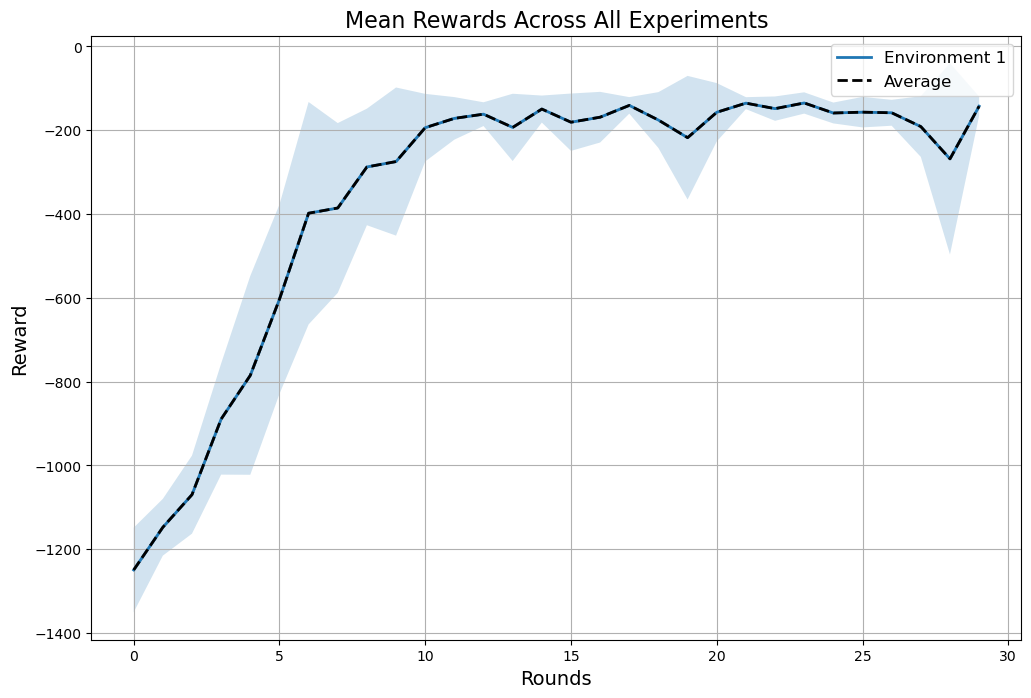

Final mean rewards and standard deviations for each environment:
Environment 1 - Final Mean Reward: -215.62, Final Std Dev: 83.41
All Environments - Final Average Mean Reward: -215.62, Final Std Dev: 0.00


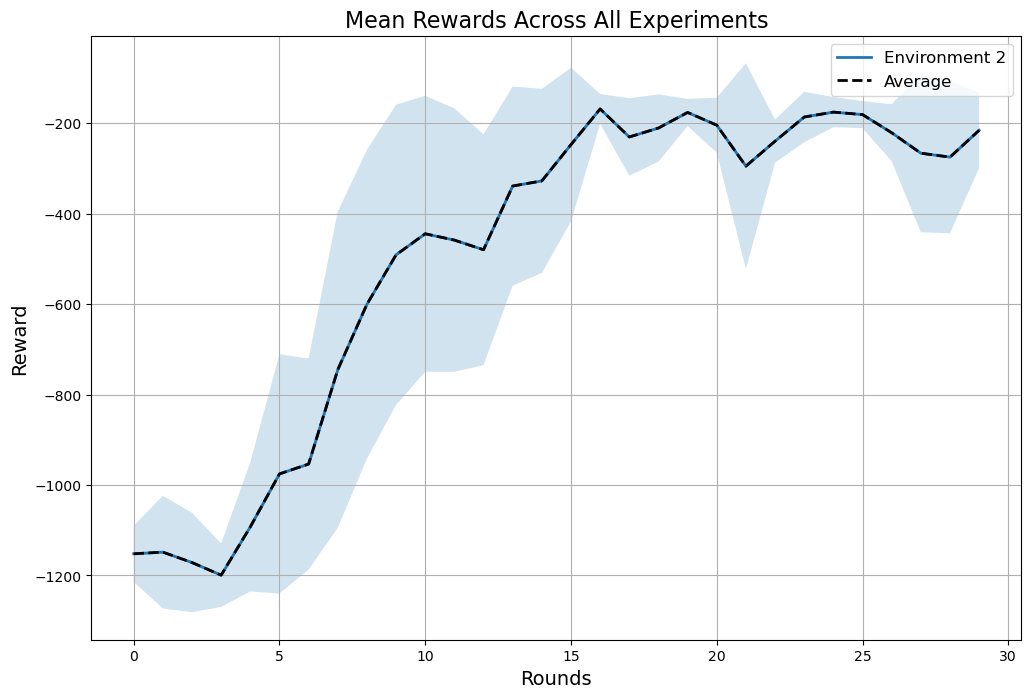

Final mean rewards and standard deviations for each environment:
Environment 1 - Final Mean Reward: -235.24, Final Std Dev: 90.62
All Environments - Final Average Mean Reward: -235.24, Final Std Dev: 0.00


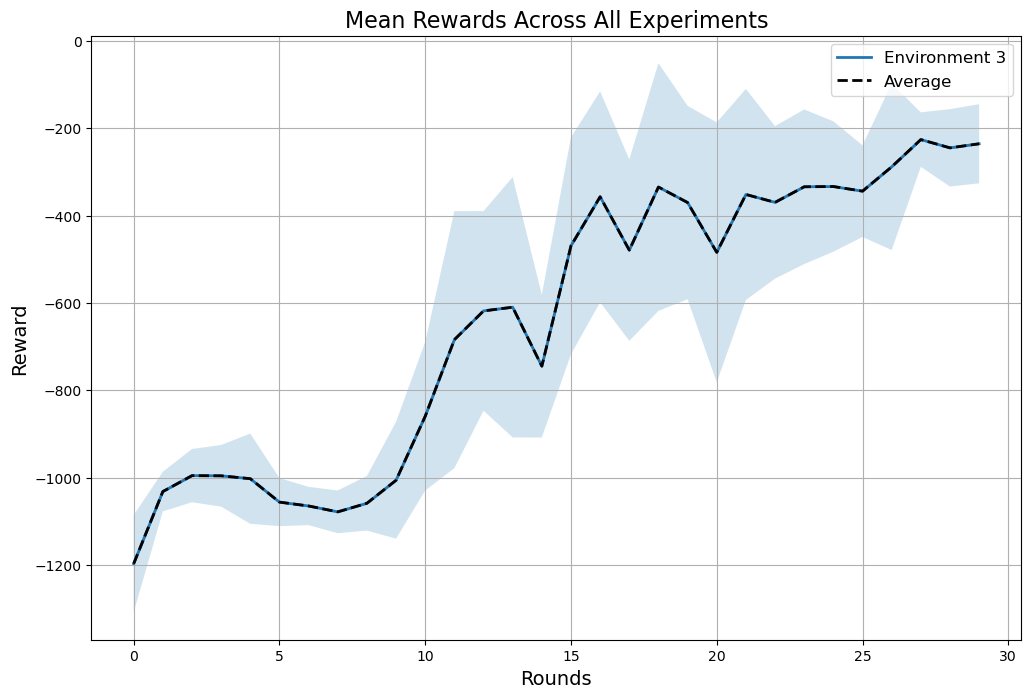

In [10]:
for envId in range(env_num):
    plot_all_experiments(all_reward_log[envId], env_id=envId)

In [43]:
all_reward_log[0][0].shape

(100, 5)

In [11]:
-(142 + 215 + 235)/3

-197.33333333333334

In [12]:
save_dir = "Res_H_Env_Pen"
for envId in range(env_num):
    # 构建文件名
    file_name = f"Single_EnsNum=1_Env{envId}.npy"
    
    # 保存数据
    np.save(os.path.join(save_dir, file_name), all_reward_log[envId])

In [44]:
load_dir = "H_Env_Env3/EnsNum5_r100_epoch10_ts500"
exp_num = 5
env_num=1

In [25]:
all_reward_log = load_all(load_dir, exp_num, env_num)
all_reward_log

file path = H_Env_Env3/EnsNum5_r100_epoch10_ts500/0_SngleModel_env_+0_reward_logs.npy
file path = H_Env_Env3/EnsNum5_r100_epoch10_ts500/1_SngleModel_env_+0_reward_logs.npy
file path = H_Env_Env3/EnsNum5_r100_epoch10_ts500/2_SngleModel_env_+0_reward_logs.npy
file path = H_Env_Env3/EnsNum5_r100_epoch10_ts500/3_SngleModel_env_+0_reward_logs.npy
file path = H_Env_Env3/EnsNum5_r100_epoch10_ts500/4_SngleModel_env_+0_reward_logs.npy


[[array([[-1039.89849275, -1076.76824569, -1041.78427606, -1063.88509267,
          -1077.80830729],
         [-1046.27195754, -1026.01176014, -1019.96325472, -1056.73851825,
          -1047.84645625],
         [-1032.7830423 , -1026.37797101, -1040.9322513 , -1028.48381952,
          -1032.23499399],
         [-1065.00925667, -1058.09517882, -1057.40766658, -1058.77528588,
          -1053.17119568],
         [-1098.98377686, -1092.55565551, -1137.06303069, -1128.93884682,
          -1128.00210266],
         [ -996.89656728,  -954.95520986,  -983.55439669,  -963.82538406,
           -986.59119363],
         [-1080.21718467, -1082.64963524, -1080.60112716, -1078.16069124,
          -1074.55927425],
         [ -927.85931381,  -932.83736629,  -973.32395291,  -926.61490091,
           -944.37870136],
         [-1226.3759425 , -1239.85569517, -1240.48280037, -1248.62421809,
          -1239.72962952],
         [ -951.90840062,  -954.47646832,  -967.77218419,  -952.92047668,
           -938.4

In [47]:
all_reward_log[0][0].shape

(100, 5)

Final mean rewards and standard deviations for each environment:
Environment 1 - Final Mean Reward: -265.32, Final Std Dev: 66.03
Environment 2 - Final Mean Reward: -259.19, Final Std Dev: 77.84
Environment 3 - Final Mean Reward: -256.59, Final Std Dev: 89.75
Environment 4 - Final Mean Reward: -249.20, Final Std Dev: 98.69
Environment 5 - Final Mean Reward: -222.72, Final Std Dev: 35.46
All Environments - Final Average Mean Reward: -250.60, Final Std Dev: 14.87


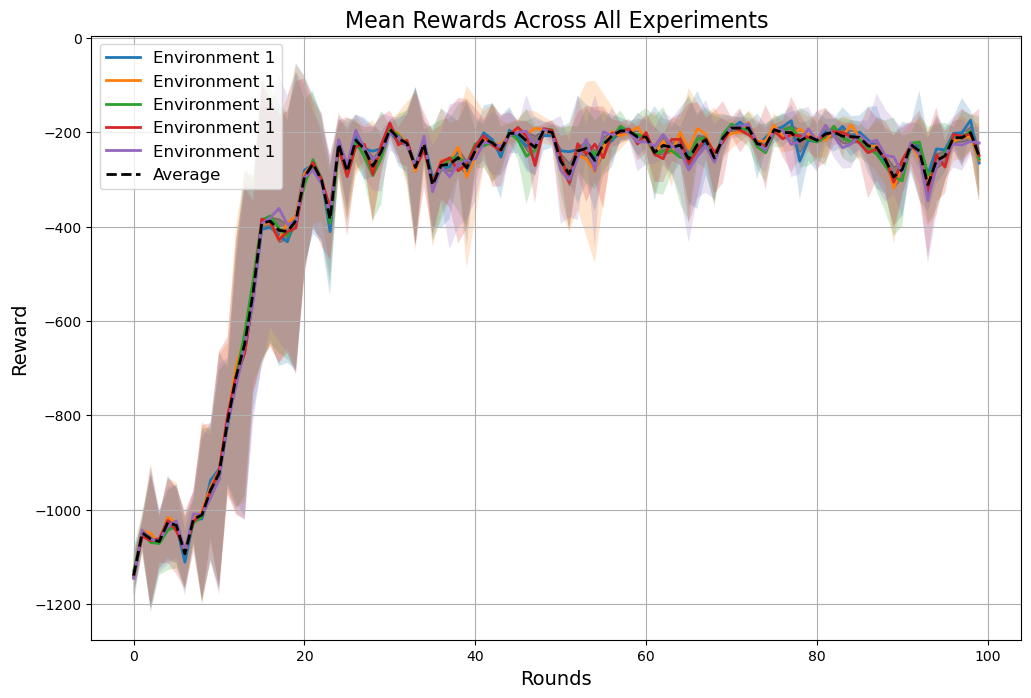

In [48]:
plot_all_experiments(all_reward_log[0], env_id=0)

In [49]:
all_reward_log[0][0]|

array([[-1039.89849275, -1076.76824569, -1041.78427606, -1063.88509267,
        -1077.80830729],
       [-1046.27195754, -1026.01176014, -1019.96325472, -1056.73851825,
        -1047.84645625],
       [-1032.7830423 , -1026.37797101, -1040.9322513 , -1028.48381952,
        -1032.23499399],
       [-1065.00925667, -1058.09517882, -1057.40766658, -1058.77528588,
        -1053.17119568],
       [-1098.98377686, -1092.55565551, -1137.06303069, -1128.93884682,
        -1128.00210266],
       [ -996.89656728,  -954.95520986,  -983.55439669,  -963.82538406,
         -986.59119363],
       [-1080.21718467, -1082.64963524, -1080.60112716, -1078.16069124,
        -1074.55927425],
       [ -927.85931381,  -932.83736629,  -973.32395291,  -926.61490091,
         -944.37870136],
       [-1226.3759425 , -1239.85569517, -1240.48280037, -1248.62421809,
        -1239.72962952],
       [ -951.90840062,  -954.47646832,  -967.77218419,  -952.92047668,
         -938.4078728 ],
       [-1080.46248705, -1090.